## 清洗初始的文本数据

In [1]:
import pandas as pd
import re
import os

In [2]:
working_dir = r'D:\\'

In [3]:
report = pd.read_pickle('D:/redata/NLP_sen/rpt_forecast_stk2016_2022.pk')
report

,id,report_id,stock_code,stock_name,title,content,report_type,reliability,organ_id,organ_name,...,current_price,refered_capital,is_capital_change,currency,settlement_date,language,attention,entrytime,updatetime,tmstamp
0,617680,753935,603636,南威软件,南威软件：设立河北分布云基金，政务云业务重大突破,事件：公司公告与国控张家口、鼎众投资、河北国控以及中投公司共同出资设立河北分布云基金...,25,NaN,217,安信证券,...,97.82,10000.0,0.0,None,,0.0,一般报告,2016-01-04 18:17:32,2017-09-04 18:17:32,4396055611
1,617681,753946,300014,亿纬锂能,亿纬锂能：动力锂电池进入订单释放期,投资要点：\r\n\r\n 公司动力电池持续放量是公司未来高速成长的最大驱动力。\...,25,NaN,119,东北证券,...,32.82,42700.0,0.0,None,,0.0,一般报告,2016-01-04 18:17:32,2017-09-04 18:17:32,4396132538
2,617682,753974,300294,博雅生物,博雅生物：再次获批两个新浆站，血制品业绩弹性大,事件：江西省卫计委同意公司在赣州市于都县和九江市都昌县新设单采浆站。\r\n\r\n...,25,NaN,30,西南证券,...,38.93,26700.0,0.0,None,,0.0,一般报告,2016-01-04 18:17:32,2017-09-04 18:17:32,4396131562
3,617704,753991,002030,达安基因,达安基因：体外诊断业领导者，打造平台型产业链,本报告导读：\r\n\r\n 基因测序行业领先的全产业链公司，随医疗服务终端拓展及激...,25,NaN,2,国泰君安,...,42.70,65900.0,1.0,None,,0.0,首次关注,2016-01-04 18:17:32,2017-09-04 18:17:32,4396131585
4,617705,754015,600351,亚宝药业,亚宝药业点评报告：喜儿康获新版GMP认证，外延步伐加快,事件：\r\n\r\n 12月31日，公司全资子公司“亚宝药业太原制药”取得“对乙...,25,NaN,10520,广证恒生咨询,...,16.07,78700.0,0.0,None,,0.0,一般报告,2016-01-04 18:17:32,2017-09-04 18:17:32,4396134052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351167,3512888,1515528,603868,飞科电器,家电行业研究：双11专题（终）：双十一收官，科沃斯、小熊、火星人亮眼——W45周观点,None,21,NaN,109,国金证券,...,76.68,NaN,NaN,None,None,NaN,一般报告,2022-11-14 18:04:43,2022-11-14 18:04:43,5993166398
351168,3512634,1515582,603309,维力医疗,华创医药周观点：大行情蓄势待发,None,21,NaN,7104,华创证券,...,21.15,NaN,NaN,None,None,NaN,一般报告,2022-11-14 18:04:43,2022-11-14 18:04:43,5993166143
351169,3512954,1515646,603939,益丰药房,医药生物：“20条”前后对比体现什么？自我驱动型抗疫消费是下一阶段重点,None,21,NaN,117,国盛证券,...,64.87,NaN,NaN,None,None,NaN,一般报告,2022-11-14 18:04:43,2022-11-14 18:04:43,5993166464
351170,3512889,1515633,688690,纳微科技,疫情防控政策迎来边际变化，关注疫苗、新冠药物和医疗服务的增量机遇：医药行业景气度盘点专题＆市...,None,21,NaN,13,中信证券,...,65.15,NaN,NaN,None,None,NaN,一般报告,2022-11-14 18:04:43,2022-11-14 18:04:43,5993166399


In [4]:
data_test_head = pd.DataFrame(report.iloc[0])
data_test_head

,0
id,617680
report_id,753935
stock_code,603636
stock_name,南威软件
title,南威软件：设立河北分布云基金，政务云业务重大突破
content,事件：公司公告与国控张家口、鼎众投资、河北国控以及中投公司共同出资设立河北分布云基金...
report_type,25
reliability,NaN
organ_id,217
organ_name,安信证券


In [5]:
df = pd.DataFrame(columns= ['report_id','time','stock_code','stock_name','content','classification'])
df['report_id'] = report['report_id']
df['content'] = report['title']+report['content']
df['stock_code'] = report['stock_code']
df['stock_name'] = report['stock_name']
df['time'] = report['entrytime']
df['content'] = df['content'].replace(r'[^\u4e00-\u9fa5]','',regex=True)
df

,report_id,time,stock_code,stock_name,content,classification
0,753935,2016-01-04 18:17:32,603636,南威软件,南威软件设立河北分布云基金政务云业务重大突破事件公司公告与国控张家口鼎众投资河北国控以及中投...,NaN
1,753946,2016-01-04 18:17:32,300014,亿纬锂能,亿纬锂能动力锂电池进入订单释放期投资要点公司动力电池持续放量是公司未来高速成长的最大驱动力签...,NaN
2,753974,2016-01-04 18:17:32,300294,博雅生物,博雅生物再次获批两个新浆站血制品业绩弹性大事件江西省卫计委同意公司在赣州市于都县和九江市都昌...,NaN
3,753991,2016-01-04 18:17:32,002030,达安基因,达安基因体外诊断业领导者打造平台型产业链本报告导读基因测序行业领先的全产业链公司随医疗服务终...,NaN
4,754015,2016-01-04 18:17:32,600351,亚宝药业,亚宝药业点评报告喜儿康获新版认证外延步伐加快事件月日公司全资子公司亚宝药业太原制药取得对乙酰...,NaN
...,...,...,...,...,...,...
351167,1515528,2022-11-14 18:04:43,603868,飞科电器,NaN,NaN
351168,1515582,2022-11-14 18:04:43,603309,维力医疗,NaN,NaN
351169,1515646,2022-11-14 18:04:43,603939,益丰药房,NaN,NaN
351170,1515633,2022-11-14 18:04:43,688690,纳微科技,NaN,NaN


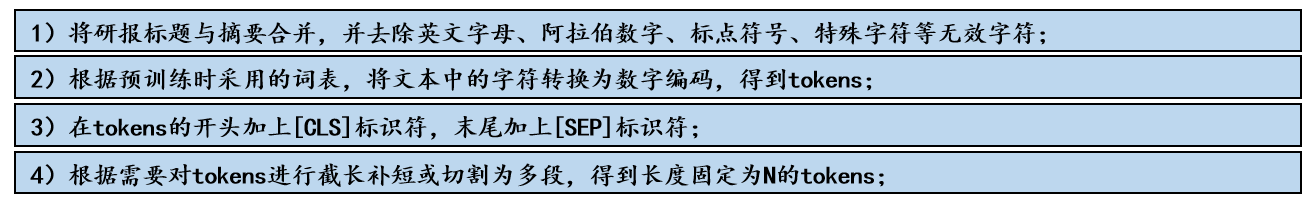

In [6]:
df['classification'] = 1
df = df.dropna()
df = df.drop_duplicates(subset=['content'])
df = df.reset_index(drop=True)
df = df.drop(index = df[df['content'] == df['stock_name']].index,axis=0)
df = df.reset_index(drop=True)
df

,report_id,time,stock_code,stock_name,content,classification
0,753935,2016-01-04 18:17:32,603636,南威软件,南威软件设立河北分布云基金政务云业务重大突破事件公司公告与国控张家口鼎众投资河北国控以及中投...,1
1,753946,2016-01-04 18:17:32,300014,亿纬锂能,亿纬锂能动力锂电池进入订单释放期投资要点公司动力电池持续放量是公司未来高速成长的最大驱动力签...,1
2,753974,2016-01-04 18:17:32,300294,博雅生物,博雅生物再次获批两个新浆站血制品业绩弹性大事件江西省卫计委同意公司在赣州市于都县和九江市都昌...,1
3,753991,2016-01-04 18:17:32,002030,达安基因,达安基因体外诊断业领导者打造平台型产业链本报告导读基因测序行业领先的全产业链公司随医疗服务终...,1
4,754015,2016-01-04 18:17:32,600351,亚宝药业,亚宝药业点评报告喜儿康获新版认证外延步伐加快事件月日公司全资子公司亚宝药业太原制药取得对乙酰...,1
...,...,...,...,...,...,...
356842,1447702,2022-04-29 15:57:23,688266,泽璟制药,泽璟制药多纳非尼竞争格局好创新药陆续进入上市阶段核心观点事件年公司实现营收亿元研发费用亿元归...,1
356843,1447703,2022-04-29 15:57:23,000636,风华高科,风华高科业绩小幅下滑行业或将触底回暖事件公司于月日发布年年度报告与年一季报公告显示年公司实现...,1
356844,1447704,2022-04-29 15:57:23,002271,东方雨虹,东方雨虹一季报点评增长保持韧性再显防水龙头实力核心观点收入增长稳健股权激励费用影响业绩公司实...,1
356845,1447680,2022-04-29 15:57:23,000002,万科A,万科一季度盈利稳增建议关注后续拿地节奏业绩回顾年一季度业绩符合我们预期万科公布年一季度业绩营...,1


In [7]:
# df.to_pickle('D:/redata/NLP_sen/textdata_cleaned_1-1.pkl')
df.to_parquet('D:/redata/NLP_sen/textdata_cleaned_1-1.parquet')

In [8]:
df

,report_id,time,stock_code,stock_name,content,classification
0,753935,2016-01-04 18:17:32,603636,南威软件,南威软件设立河北分布云基金政务云业务重大突破事件公司公告与国控张家口鼎众投资河北国控以及中投...,1
1,753946,2016-01-04 18:17:32,300014,亿纬锂能,亿纬锂能动力锂电池进入订单释放期投资要点公司动力电池持续放量是公司未来高速成长的最大驱动力签...,1
2,753974,2016-01-04 18:17:32,300294,博雅生物,博雅生物再次获批两个新浆站血制品业绩弹性大事件江西省卫计委同意公司在赣州市于都县和九江市都昌...,1
3,753991,2016-01-04 18:17:32,002030,达安基因,达安基因体外诊断业领导者打造平台型产业链本报告导读基因测序行业领先的全产业链公司随医疗服务终...,1
4,754015,2016-01-04 18:17:32,600351,亚宝药业,亚宝药业点评报告喜儿康获新版认证外延步伐加快事件月日公司全资子公司亚宝药业太原制药取得对乙酰...,1
...,...,...,...,...,...,...
356842,1447702,2022-04-29 15:57:23,688266,泽璟制药,泽璟制药多纳非尼竞争格局好创新药陆续进入上市阶段核心观点事件年公司实现营收亿元研发费用亿元归...,1
356843,1447703,2022-04-29 15:57:23,000636,风华高科,风华高科业绩小幅下滑行业或将触底回暖事件公司于月日发布年年度报告与年一季报公告显示年公司实现...,1
356844,1447704,2022-04-29 15:57:23,002271,东方雨虹,东方雨虹一季报点评增长保持韧性再显防水龙头实力核心观点收入增长稳健股权激励费用影响业绩公司实...,1
356845,1447680,2022-04-29 15:57:23,000002,万科A,万科一季度盈利稳增建议关注后续拿地节奏业绩回顾年一季度业绩符合我们预期万科公布年一季度业绩营...,1
